In [3]:
# %load font.py
#!/usr/bin/env python

# In[1]:
import matplotlib.pyplot as plt

import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        plt.rc('font', family='Malgun Gothic') 

plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결



In [5]:
import seaborn as sns

In [7]:
titanic=sns.load_dataset('titanic')

print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


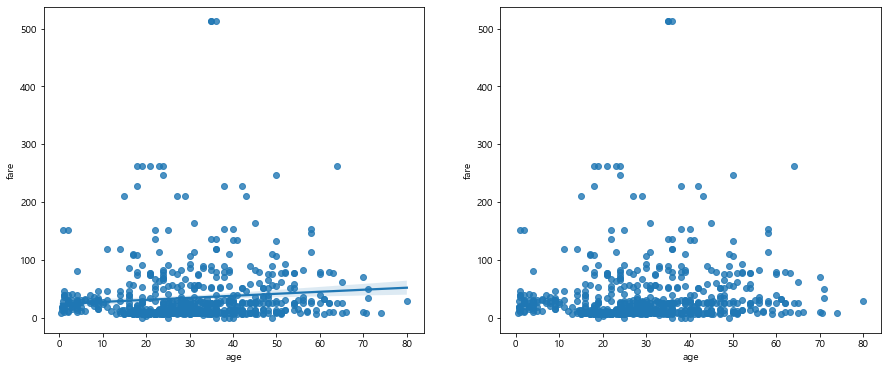

In [11]:
#회귀선이 있는 scatter 그래프. 회귀선이 없는 2개의 그래프
fig=plt.figure(figsize=(15,6))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

sns.regplot(x='age',y='fare',
            data=titanic,
            ax=ax1)
sns.regplot(x='age',y='fare',
            data=titanic,
            ax=ax2,
            fit_reg=False)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


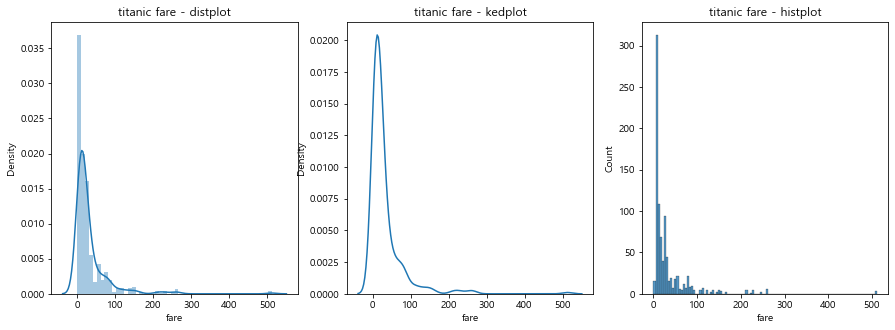

In [12]:
#커널 밀도 distplot()
# 스타일 테마 설정 (dark)

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# distplot
sns.distplot(titanic['fare'], ax=ax1) 

# kdeplot
sns.kdeplot(x='fare', data=titanic, ax=ax2) 

# histplot
sns.histplot(x='fare', data=titanic,  ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic fare - distplot')
ax2.set_title('titanic fare - kedplot')
ax3.set_title('titanic fare - histplot')

plt.show()

In [18]:
#지도 그래프
import folium
import pandas as pd

# 서울 지도 만들기
seoul_map2 = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)
seoul_map3 = folium.Map(location=[37.55,126.98], tiles='Stamen Toner', 
                        zoom_start=15)

# 지도를 HTML 파일로 저장하기
seoul_map2.save('C:/Users/JYP/Documents/pandas/dataset/seoul2.html')
seoul_map3.save('C:/Users/JYP/Documents/pandas/dataset/seoul3.html')

In [33]:
df=pd.read_excel('C:/Users/JYP/Documents/pandas/dataset/서울지역 대학교 위치.xlsx')
df
seoul_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', zoom_start=12)


for name, lat, lng in zip(df.index, df.위도, df.경도): # 파일 묶어야 출력가능
    folium.Marker([lat,lng],popup=name).add_to(seoul_map)

seoul_map.save('C:/Users/JYP/Documents/pandas/dataset/seoul.html')


In [31]:
df.set_index('Unnamed: 0',inplace=True)
df

KeyError: "None of ['Unnamed: 0'] are in the columns"

In [38]:
df=pd.read_excel('C:/Users/JYP/Documents/pandas/dataset/서울지역 대학교 위치.xlsx',header=None,skiprows=1)
df.columns=['학교명','위도','경도']
print(df.head())
df.set_index('학교명',inplace=True)

seoul_map.save('C:/Users/JYP/Documents/pandas/dataset/seoul.html')
df.head()

            학교명         위도          경도
0  KAIST 서울캠퍼스   37.592573  127.046737
1         KC대학교  37.548345  126.854797
2  가톨릭대학교(성신교정)  37.585922  127.004328
3  가톨릭대학교(성의교정)  37.499623  127.006065
4      감리교신학대학교  37.567645  126.961610


,위도,경도
학교명,,
KAIST 서울캠퍼스,37.592573,127.046737
KC대학교,37.548345,126.854797
가톨릭대학교(성신교정),37.585922,127.004328
가톨릭대학교(성의교정),37.499623,127.006065
감리교신학대학교,37.567645,126.961610


In [40]:
import json

# 경기도 인구변화 데이터를 불러와서 데이터프레임으로 변환
file_path = 'C:/Users/JYP/Documents/pandas/dataset/경기도인구데이터.xlsx'
df = pd.read_excel(file_path, index_col='구분', engine= 'openpyxl')
df.columns = df.columns.map(str)

# 경기도 시군구 경계 정보를 가진 geo-json 파일 불러오기
geo_path = 'C:/Users/JYP/Documents/pandas/dataset/경기도행정구역경계.json'
try:
    geo_data = json.load(open(geo_path, encoding='utf-8'))
except:
    geo_data = json.load(open(geo_path, encoding='utf-8-sig'))

# 경기도 지도 만들기
g_map = folium.Map(location=[37.5502,126.982], 
                   tiles='Stamen Terrain', zoom_start=9)

# 출력할 연도 선택 (2007 ~ 2017년 중에서 선택)
year = '2017'

# Choropleth 클래스로 단계구분도 표시하기
folium.Choropleth(geo_data=geo_data,    # 지도 경계
                 data = df[year],      # 표시하려는 데이터
                 columns = [df.index, df[year]],  # 열 지정
                 fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                 threshold_scale=[10000, 100000, 300000, 500000, 700000],
                 key_on='feature.properties.name',
                 ).add_to(g_map)

# 지도를 HTML 파일로 저장하기
g_map.save('C:/Users/JYP/Documents/pandas/dataset/gyonggipopulation' + year + '.html')